In [9]:
import pandas as pd
import os

# merging 12 months of sales data into a single file

In [15]:
# Each month sales had an own csv file so we merged it

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

Read in updated dataframe

In [31]:
all_data = pd.read_csv("all_data.csv")

# clean up data

In [39]:
# Cleaning up nan
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how="all")
all_data.head()

# Cleaning up Or
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

change numbers to int

In [46]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

# Augment data with additional columns

In [65]:
# Add month column
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")

# Add sales column
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

# Add city column
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# What was the best month for sales? how much was earned that month?

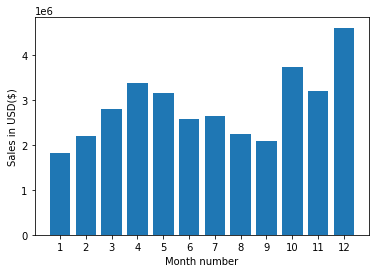

In [99]:
import matplotlib.pyplot as plt

results = all_data.groupby("Month").sum()

months = range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month number")
plt.show()


We can see the best months for sales are Oct, Nov, Dec and Apr, May.  
A good guess would be the holidays around those months.


# What city had the highest number of sales?

In [58]:
results = all_data.groupby("City").sum()
print(results)

                     Quantity Ordered    Price Each   Month         Sales
City                                                                     
 Atlanta (GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin (TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston (MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas (TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles (CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City (NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland (ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland (OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco (CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle (WA)                   16553  2.733296e+06  104941  2.747755e+06


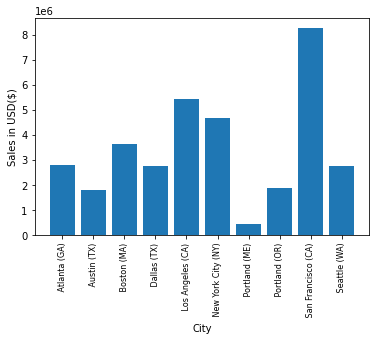

In [61]:
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities,results["Sales"])
plt.xticks(cities, rotation="vertical", size = 8)
plt.ylabel("Sales in USD($)")
plt.xlabel("City")
plt.show()

San Fransisco had the highest number of sales.  
We can connect it to the fact that silicon valley is in San Francisco, maybe people there have more money and also it is a big state.
On the other hand Portland (Maine) had the lowest number of sales and it might be because its the smallest country here.

# What time should we display advertisements to maximize likelihood of costumer buying product?

In [72]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [75]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


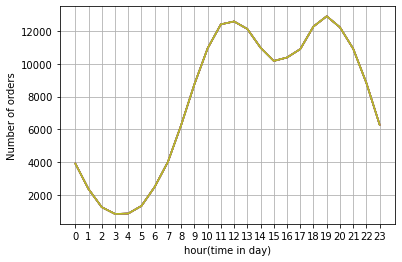

In [78]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.ylabel("Number of orders")
plt.xlabel("hour(time in day)")
plt.show()


This graph shows the number of sales against the time of the day. We can see the best hours are for sales are 11 - 12 and it might be 
pecause people go out to lunch and also 18 - 20 are good hours for sales, might be because people finish work and have time to go out, so the time we should display advertisement will be around 11-12 and around 18-20.

A good Idea is to do a chart for specific cities to understand the better the time we should display advertisement.

# What products are more often sold together?

In [82]:
# we can understand this by the order id - same order id means they were sold together
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()

df.head(10)

<ipython-input-82-4e55bc5b2cda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


In [88]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2))) #the 2 meaning it will return the pairs that are mostly sold together

count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# What product sold the most? why do you think it sold the most?

In [89]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [92]:
results = all_data.groupby("Product").sum()
print(results)

                            Quantity Ordered  Price Each   Month       Sales  \
Product                                                                        
20in Monitor                            4129   451068.99   29336   454148.71   
27in 4K Gaming Monitor                  6244  2429637.70   44440  2435097.56   
27in FHD Monitor                        7550  1125974.93   52558  1132424.50   
34in Ultrawide Monitor                  6199  2348718.19   43304  2355558.01   
AA Batteries (4-pack)                  27635    79015.68  145558   106118.40   
AAA Batteries (4-pack)                 31017    61716.59  146370    92740.83   
Apple Airpods Headphones               15661  2332350.00  109477  2349150.00   
Bose SoundSport Headphones             13457  1332366.75   94113  1345565.43   
Flatscreen TV                           4819  1440000.00   34224  1445700.00   
Google Phone                            5532  3315000.00   38305  3319200.00   
LG Dryer                                

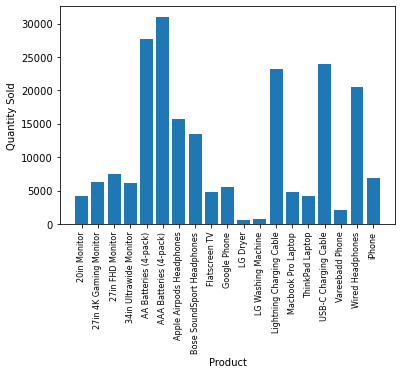

In [93]:
products = [product for product, df in all_data.groupby("Product")]
plt.bar(products, results["Quantity Ordered"])
plt.xticks(products, rotation="vertical", size = 8)
plt.ylabel("Quantity Sold")
plt.xlabel("Product")
plt.show()

 as expected the cheap products and the products with the lower life span sold the most.

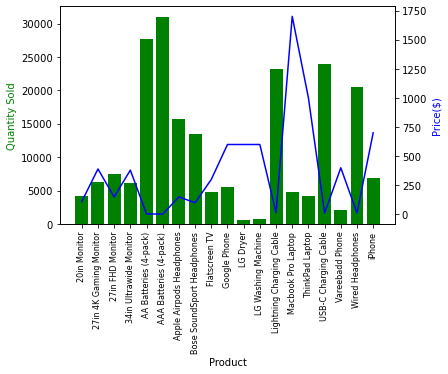

In [97]:
# we can check the correlation between the quantity sold and the prices.

prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, results["Quantity Ordered"], color="g")
ax2.plot(products, prices, "b-")
ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Sold", color="g")
ax2.set_ylabel("Price($)", color="b")
ax1.set_xticklabels(products, rotation = "vertical", size=8)

plt.show()

There is infact a correlation between the product price and the quantity sold - a thumb rule will be that the low price items sell more,
and the expensive ones sell less. Of course there are exceptions like the fact that LG Dryer is cheaper than Macbook Pro but still more Mackbook Pro's sold.
It can be explained in that that the Mackbook has more demand because it is useful to a bigger audience (students, DJ's etc).